# TP3:  Machine à Vecteurs Supports (SVM) Fichier

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time 

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.metrics import precision_score, classification_report, confusion_matrix
from sklearn.metrics import zero_one_loss

In [2]:
# import data
mnist = fetch_openml('mnist_784')

In [3]:
rand = np.random.randint(70000, size=5000)
data5000 = mnist.data[rand]
label5000 = mnist.target[rand]
print(data5000.shape)
print(label5000.shape)
print("Shape of training data : ", data5000.shape)
print("Shape of label : ", label5000.shape)

(5000, 784)
(5000,)
Shape of training data :  (5000, 784)
Shape of label :  (5000,)


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(data5000, label5000, train_size=0.7)
print("Training data shape : ", xtrain.shape)
print("Training target shape : ", ytrain.shape)
print("Testing data shape : ", xtest.shape)
print("Testing target shape : ", ytest.shape)

Training data shape :  (3500, 784)
Training target shape :  (3500,)
Testing data shape :  (1500, 784)
Testing target shape :  (1500,)


In [5]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [6]:
%time
#Construire un modèle de classification ayant comme paramètres un noyau linea

clsvm = SVC(kernel='linear').fit(xtrain,ytrain)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [7]:
%%time

ypred = clsvm.predict(xtest)
print("Classification report for classifier %s:\n%s\n"
      % (clsvm, classification_report(ytest, ypred)))
print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       158
           1       0.96      0.99      0.98       165
           2       0.88      0.90      0.89       153
           3       0.87      0.86      0.86       145
           4       0.85      0.91      0.88       138
           5       0.87      0.87      0.87       163
           6       0.94      0.96      0.95       135
           7       0.90      0.94      0.92       155
           8       0.93      0.79      0.86       144
           9       0.88      0.87      0.87       144

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weigh

In [8]:
#Afficher le score sur l’échantillon de test 
predictscore = clsvm.score(xtest,ytest)
print(predictscore)

0.904


In [9]:
#kernel
train_scores = []
test_scores = []
exec_times = []

In [10]:
%%time
## linear
clsvm = SVC(kernel='linear')
start =  time.clock()
clsvm.fit(xtrain,ytrain)
end_train = time.clock()
print("Training execution time :", end_train - start)
ypred = clsvm.predict(xtest)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clsvm, classification_report(ytest, ypred)))
print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))

train_scores.append(clsvm.score(xtrain,ytrain))
test_scores.append(clsvm.score(xtest,ytest))
exec_times.append(end_train-start)

Training execution time : 3.3930110000000013
Prediction time : 2.372690999999996
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       158
           1       0.96      0.99      0.98       165
           2       0.88      0.90      0.89       153
           3       0.87      0.86      0.86       145
           4       0.85      0.91      0.88       138
           5       0.87      0.87      0.87       163
           6       0.94      0.96      0.95       135
           7       0.90      0.94      0.92       155
           8       0.93      0.79      0.86       144
           9       0.88      0.87      0.87       144

    accuracy                    

In [11]:
%%time
## rbf
clsvm = SVC(kernel='rbf')
start =  time.clock()
clsvm.fit(xtrain,ytrain)
end_train = time.clock()
print("Training execution time :", end_train - start)
ypred = clsvm.predict(xtest)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clsvm, classification_report(ytest, ypred)))
print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))

train_scores.append(clsvm.score(xtrain,ytrain))
test_scores.append(clsvm.score(xtest,ytest))
exec_times.append(end_train-start)

Training execution time : 6.615025000000003
Prediction time : 3.6095139999999972
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       158
           1       0.99      0.99      0.99       165
           2       0.94      0.95      0.94       153
           3       0.97      0.93      0.95       145
           4       0.94      0.94      0.94       138
           5       0.92      0.95      0.94       163
           6       0.94      0.99      0.96       135
           7       0.95      0.95      0.95       155
           8       0.97      0.88      0.92       144
           9       0.91      0.96      0.93       144

    accuracy                       

In [12]:
%%time
## sigmoid
clsvm = SVC(kernel='sigmoid')
start =  time.clock()
clsvm.fit(xtrain,ytrain)
end_train = time.clock()
print("Training execution time :", end_train - start)
ypred = clsvm.predict(xtest)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clsvm, classification_report(ytest, ypred)))
print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))

train_scores.append(clsvm.score(xtrain,ytrain))
test_scores.append(clsvm.score(xtest,ytest))
exec_times.append(end_train-start)

Training execution time : 6.061072999999993
Prediction time : 3.7007340000000113
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       158
           1       0.88      0.98      0.93       165
           2       0.86      0.84      0.85       153
           3       0.87      0.75      0.80       145
           4       0.84      0.88      0.86       138
           5       0.72      0.76      0.74       163
           6       0.89      0.93      0.91       135
           7       0.90      0.92      0.91       155
           8       0.81      0.73      0.77       144
           9       0.82      0.81      0.82       144

    accuracy                   

In [13]:
%%time
## poly
clsvm = SVC(kernel='poly')
start =  time.clock()
clsvm.fit(xtrain,ytrain)
end_train = time.clock()
print("Training execution time :", end_train - start)
ypred = clsvm.predict(xtest)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clsvm, classification_report(ytest, ypred)))
print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))

train_scores.append(clsvm.score(xtrain,ytrain))
test_scores.append(clsvm.score(xtest,ytest))
exec_times.append(end_train-start)

Training execution time : 6.310091999999997
Prediction time : 2.748027999999991
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       158
           1       0.85      1.00      0.92       165
           2       0.96      0.88      0.92       153
           3       0.97      0.87      0.92       145
           4       0.91      0.91      0.91       138
           5       0.88      0.95      0.91       163
           6       0.96      0.96      0.96       135
           7       0.93      0.94      0.94       155
           8       0.97      0.85      0.90       144
           9       0.88      0.92      0.90       144

    accuracy                       

In [14]:
%%time
## precomputed
clsvm = SVC(kernel='precomputed')
start =  time.clock()
clsvm.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
end_train = time.clock()
print("Training execution time :", end_train - start)
ypred = clsvm.predict(xtest.dot(np.transpose(xtrain)))
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clsvm, classification_report(ytest, ypred)))
print("Confusion matrix:\n%s" % confusion_matrix(ytest, ypred))

train_scores.append(clsvm.score(xtrain.dot(np.transpose(xtrain)),ytrain))
test_scores.append(clsvm.score(xtest.dot(np.transpose(xtrain)),ytest))
exec_times.append(end_train-start)

Training execution time : 1.0522760000000062
Prediction time : 0.6336160000000035
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       158
           1       0.96      0.99      0.98       165
           2       0.88      0.90      0.89       153
           3       0.87      0.86      0.86       145
           4       0.85      0.91      0.88       138
           5       0.87      0.87      0.87       163
           6       0.94      0.96      0.95       135
           7       0.90      0.94      0.92       155
           8       0.93      0.79      0.86       144
           9       0.88      0.87      0.87       144

    accuracy              

In [15]:
print(train_scores)
print(test_scores)
print(exec_times)

[1.0, 0.9882857142857143, 0.8577142857142858, 0.9842857142857143, 1.0]
[0.904, 0.9513333333333334, 0.8513333333333334, 0.9246666666666666, 0.904]
[3.3930110000000013, 6.615025000000003, 6.061072999999993, 6.310091999999997, 1.0522760000000062]


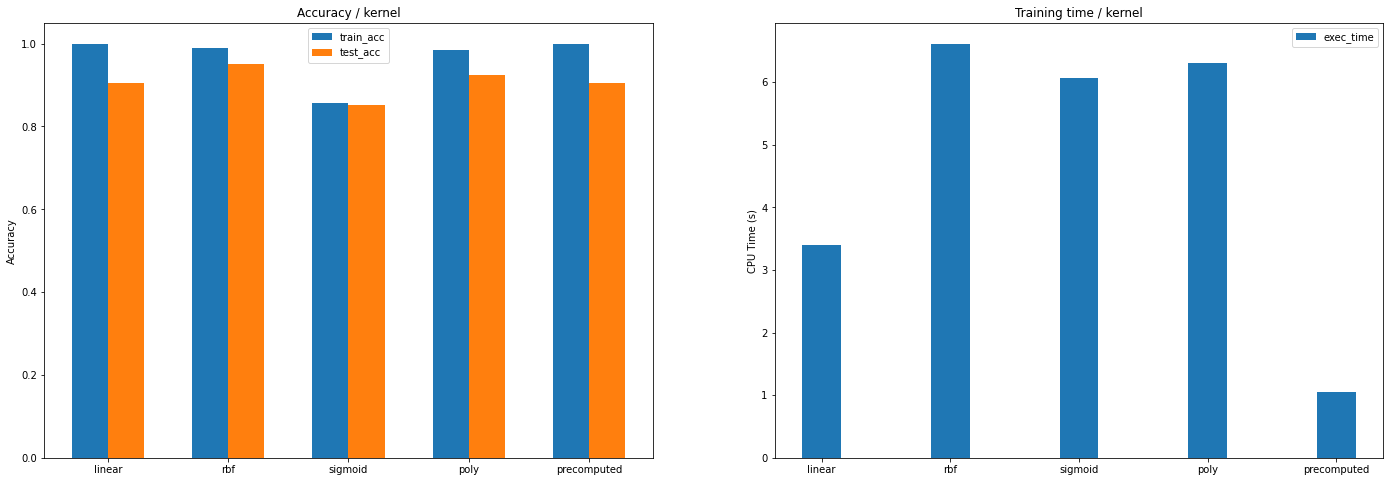

<Figure size 432x288 with 0 Axes>

In [16]:
## PLOT
kernels = ('linear', 'rbf', 'sigmoid','poly','precomputed')
y_pos = np.arange(len(kernels))
bar_width = 0.3
opacity = 1

plt.figure(figsize=(24,8))
plt.subplot(121)
plt.bar(y_pos,train_scores,bar_width,align='center',alpha=opacity,label='train_acc')
plt.bar(y_pos+bar_width,test_scores,bar_width,align='center',alpha=opacity,label='test_acc')
plt.xticks(y_pos+bar_width/2,kernels)
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy / kernel')

plt.subplot(122)
plt.bar(y_pos,exec_times,bar_width,align='center',alpha=opacity,label='exec_time')
plt.xticks(y_pos,kernels)
plt.ylabel('CPU Time (s)')
plt.legend()
plt.title('Training time / kernel')

plt.show()
plt.savefig('TP3-kernel.png')

In [17]:
c_settings = np.linspace(0.1,1,10)
test_scores = []
for c in c_settings : 
    clsvm = SVC(kernel='rbf', C=c)
    clsvm = clsvm.fit(xtrain,ytrain)
    test_scores.append(clsvm.score(xtest,ytest))
    print(test_scores)

[0.8973333333333333]
[0.8973333333333333, 0.9146666666666666]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928, 0.934]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928, 0.934, 0.938]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928, 0.934, 0.938, 0.942]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928, 0.934, 0.938, 0.942, 0.9446666666666667]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928, 0.934, 0.938, 0.942, 0.9446666666666667, 0.9486666666666667]
[0.8973333333333333, 0.9146666666666666, 0.9253333333333333, 0.928, 0.934, 0.938, 0.942, 0.9446666666666667, 0.9486666666666667, 0.9513333333333334]


No handles with labels found to put in legend.


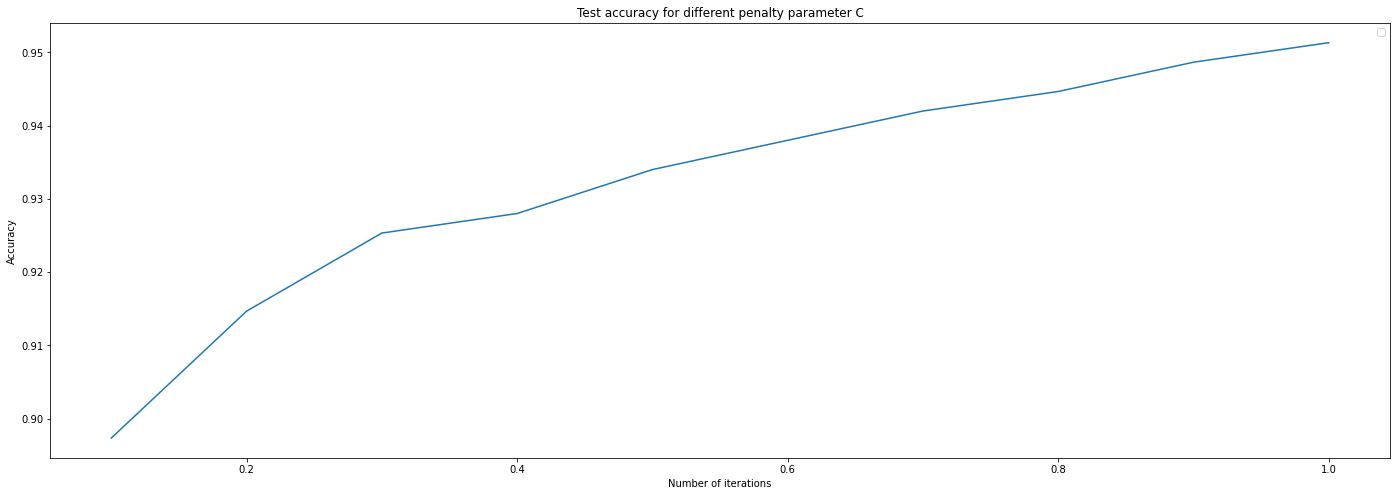

In [18]:
## PLOT
plt.figure(figsize=(24,8))
plt.plot(c_settings,test_scores)
#plt.scatter(c_settings,all_scores,marker='.')
plt.legend(loc='best')
plt.title("Test accuracy for different penalty parameter C")
plt.ylabel("Accuracy")
plt.xlabel("Number of iterations")

plt.show()

In [19]:
c_settings = np.linspace(0.1,1,10)
kernels = ('linear', 'poly', 'rbf', 'sigmoid','precomputed')
all_scores = []
for k in kernels:
  test_scores = []
  if (k !='precomputed'):
    for c in c_settings : 
        clsvm = SVC(kernel=k, C=c)
        clsvm = clsvm.fit(xtrain,ytrain)
        test_scores.append(clsvm.score(xtest,ytest))
  else:
    for c in c_settings : 
        clsvm = SVC(kernel=k, C=c)
        clsvm = clsvm.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
        test_scores.append(clsvm.score(xtest.dot(np.transpose(xtrain)),ytest))

  all_scores.append(test_scores)

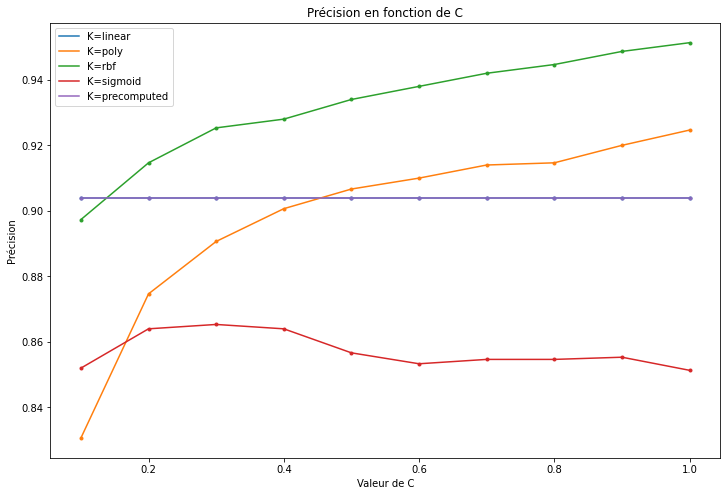

In [20]:
## PLOT
plt.figure(figsize=(12,8))
for i in range(len(kernels)):
    plt.plot(c_settings,all_scores[i],label='K={}'.format(kernels[i]))
    plt.scatter(c_settings,all_scores[i],marker='.')
plt.legend(loc='best')
plt.title("Précision en fonction de C")
plt.ylabel("Précision")
plt.xlabel("Valeur de C")

plt.show()

In [21]:
#error test
c_settings = np.linspace(0.1,1,10)
kernels = ('linear', 'poly', 'rbf', 'sigmoid','precomputed')
all_errors = []
all_time = []
for k in kernels:
  errors = []
  times = []
  if (k !='precomputed'):
    for c in c_settings : 
        clsvm = SVC(kernel=k, C=c)
        start = time.clock()
        clsvm = clsvm.fit(xtrain,ytrain)
        end = time.clock()
        ypred = clsvm.predict(xtest)
        errors.append(zero_one_loss(ypred, ytest))
        times.append(end-start)
  else:
    for c in c_settings : 
        clsvm = SVC(kernel=k, C=c)
        start = time.clock()
        clsvm = clsvm.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
        end = time.clock()
        ypred = clsvm.predict(xtest.dot(np.transpose(xtrain)))
        errors.append(zero_one_loss(ypred, ytest))
        times.append(end-start)

  all_errors.append(errors)
  all_time.append(times)

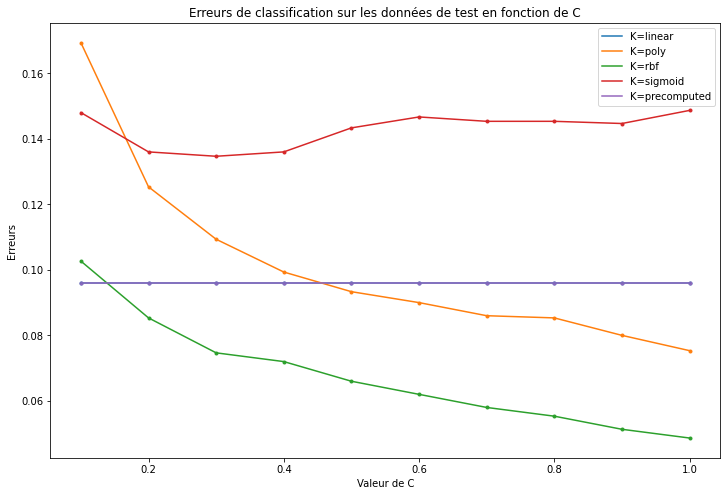

In [22]:
## PLOT
plt.figure(figsize=(12,8))
for i in range(len(kernels)):
    plt.plot(c_settings,all_errors[i],label='K={}'.format(kernels[i]))
    plt.scatter(c_settings,all_errors[i],marker='.')
plt.legend(loc='best')
plt.title("Erreurs de classification sur les données de test en fonction de C")
plt.ylabel("Erreurs")
plt.xlabel("Valeur de C")

plt.show()

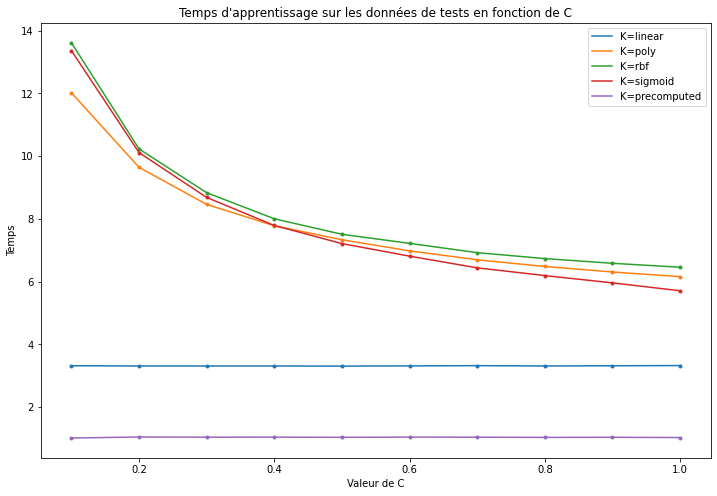

In [23]:
## PLOT
plt.figure(figsize=(12,8))
for i in range(len(kernels)):
    plt.plot(c_settings,all_time[i],label='K={}'.format(kernels[i]))
    plt.scatter(c_settings,all_time[i],marker='.')
plt.legend(loc='best')
plt.title("Temps d'apprentissage sur les données de tests en fonction de C")
plt.ylabel("Temps")
plt.xlabel("Valeur de C")

plt.show()

In [24]:
#error train
c_settings = np.linspace(0.1,1,10)
kernels = ('linear', 'poly', 'rbf', 'sigmoid','precomputed')
all_errors = []
all_time = []
for k in kernels:
  errors = []
  times = []
  if (k !='precomputed'):
    for c in c_settings : 
        clsvm = SVC(kernel=k, C=c)
        start = time.clock()
        clsvm = clsvm.fit(xtrain,ytrain)
        end = time.clock()
        ypred = clsvm.predict(xtrain)
        errors.append(zero_one_loss(ypred, ytrain))
        times.append(end-start)
  else:
    for c in c_settings : 
        clsvm = SVC(kernel=k, C=c)
        start = time.clock()
        clsvm = clsvm.fit(xtrain.dot(np.transpose(xtrain)),ytrain)
        end = time.clock()
        ypred = clsvm.predict(xtrain.dot(np.transpose(xtrain)))
        errors.append(zero_one_loss(ypred, ytrain))
        times.append(end-start)

  all_errors.append(errors)
  all_time.append(times)

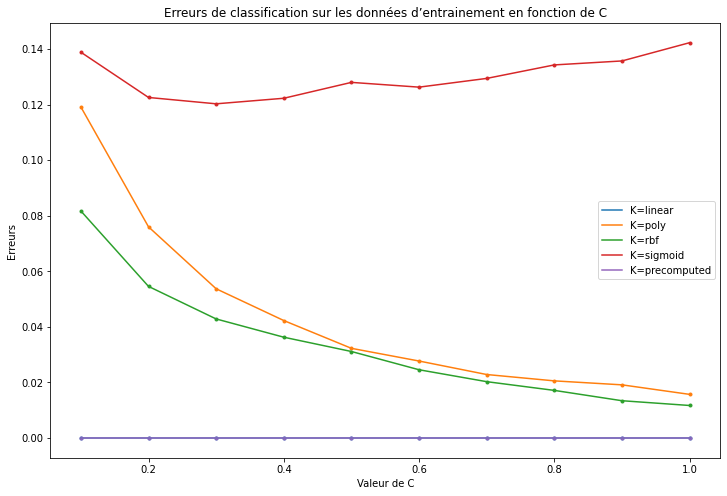

In [25]:
## PLOT
plt.figure(figsize=(12,8))
for i in range(len(kernels)):
    plt.plot(c_settings,all_errors[i],label='K={}'.format(kernels[i]))
    plt.scatter(c_settings,all_errors[i],marker='.')
plt.legend(loc='best')
plt.title("Erreurs de classification sur les données d’entrainement en fonction de C")
plt.ylabel("Erreurs")
plt.xlabel("Valeur de C")

plt.show()

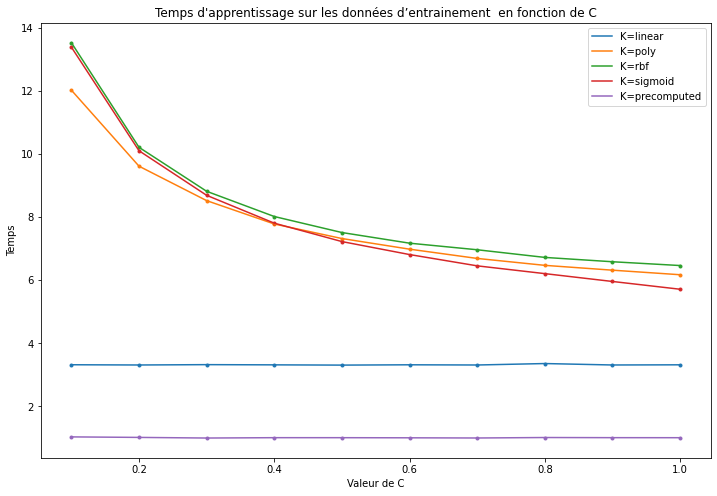

In [26]:
## PLOT
plt.figure(figsize=(12,8))
for i in range(len(kernels)):
    plt.plot(c_settings,all_time[i],label='K={}'.format(kernels[i]))
    plt.scatter(c_settings,all_time[i],marker='.')
plt.legend(loc='best')
plt.title("Temps d'apprentissage sur les données d’entrainement  en fonction de C")
plt.ylabel("Temps")
plt.xlabel("Valeur de C")

plt.show()